## Notes
Assignment : Unsupervised Learning and Dimensionality Reduction
Name: Zobair








Plans:
Implement:
- k-means clustering
- expectation maximization

Implement:
- PCA
- ICA
- Randomized Projections
- Feature selection algorithm


## Notes---
k-means
1. Choose a value for k, the number of clusters.
2. Select k data points at random from the dataset as the initial cluster centroids.
3. For each data point, compute the distance to each of the centroids.
4. Assign each data point to the cluster whose centroid is closest.
5. Recompute the centroids of each cluster as the mean of the data points assigned to that cluster.
6. Repeat steps 3-5 until the centroids of the clusters stop changing.

maximication ---

1. Choose the number of clusters, k.
2. Initialize the k cluster centers.
3. Repeat until convergence:
    a. For each point, find the cluster center closest to it.
    b. Update each cluster center to be the mean of the points assigned to it.



Paper outlinss
Intro
Datasets
- why dataset are interesting
- what are the dataset


explanation:
how to choose k?
what cluster did it generate?

Analysis of result
how data look like in new space with all the algo
- ICA
- PCA
- Randomized Projection
- feature selection algo

After rerunning
- difference in speed/ perf or anything at all? 


PROMPTS:
Why?
Now it's time to explore unsupervised learning algorithms. This part of the assignment asks you to use some of the clustering and dimensionality reduction algorithms we've looked at in class and to revisit earlier assignments. The goal is for you to think about how these algorithms are the same as, different from, and interact with your earlier work.

The same ground rules apply for programming languages and libraries.

The Problems Given to You
You are to implement (or find the code for) six algorithms. The first two are clustering algorithms:

k-means clustering
Expectation Maximization
You can choose your own measures of distance/similarity. Naturally, you'll have to justify your choices, but you're practiced at that sort of thing by now.

The last four algorithms are dimensionality reduction algorithms:

PCA
ICA
Randomized Projections
Any other feature selection algorithm you desire
You are to run a number of experiments. Come up with at least two datasets. If you'd like (and it makes a lot of sense in this case) you can use the ones you used in the first assignment.

Run the clustering algorithms on the datasets and describe what you see.
Apply the dimensionality reduction algorithms to the two datasets and describe what you see.
Reproduce your clustering experiments, but on the data after you've run dimensionality reduction on it. Yes, that’s 16 combinations of datasets, dimensionality reduction, and clustering method. You should look at all of them, but focus on the more interesting findings in your report.
Apply the dimensionality reduction algorithms to one of your datasets from assignment #1 (if you've reused the datasets from assignment #1 to do experiments 1-3 above then you've already done this) and rerun your neural network learner on the newly projected data.
Apply the clustering algorithms to the same dataset to which you just applied the dimensionality reduction algorithms (you've probably already done this), treating the clusters as if they were new features. In other words, treat the clustering algorithms as if they were dimensionality reduction algorithms. Again, rerun your neural network learner on the newly projected data.
What to Turn In
You must submit:

A file named README.txt that contains instructions for running your code, including a link of some sort to your code
a file named yourgtaccount-analysis.pdf that contains your writeup.
The file yourgtaccount-analysis.pdf should contain: 

a discussion of your datasets, and why they're interesting: If you're using the same datasets as before at least briefly remind us of what they are so we don't have to revisit your old assignment write-up... and if you aren't well that's a whole lot of work you're going to have to recreate from assignment 1 isn't it?

There is no one answer to this question as it will depend on the data and the number of clusters chosen. However, it is possible to get a variety of different clusters, including those that are well-separated and those that are more mixed.
explanations of your methods: for example, how did you choose k?



a description of the kind of clusters that you got.


analyses of your results. Why did you get the clusters you did? Do they make "sense"? If you used data that already had labels (for example data from a classification problem from assignment #1) did the clusters line up with the labels? Do they otherwise line up naturally? Why or why not? Compare and contrast the different algorithms. What sort of changes might you make to each of those algorithms to improve performance? How much performance was due to the problems you chose? Be creative and think of as many questions you can, and as many answers as you can. Take care to justify your analysis with data explicitly.
Can you describe how the data look in the new spaces you created with the various algorithms? For PCA, what is the distribution of eigenvalues? For ICA, how kurtotic are the distributions? Do the projection axes for ICA seem to capture anything "meaningful"? Assuming you only generate k projections (i.e., you do dimensionality reduction), how well is the data reconstructed by the randomized projections? PCA? How much variation did you get when you re-ran your RP several times (I know I don't have to mention that you might want to run RP many times to see what happens, but I hope you forgive me)?
When you reproduced your clustering experiments on the datasets projected onto the new spaces created by ICA, PCA, and RP, did you get the same clusters as before? Different clusters? Why? Why not?
When you re-ran your neural network algorithms were there any differences in performance? Speed? Anything at all?
It might be difficult to generate the same kinds of graphs for this part of the assignment as you did before; however, you should come up with some way to describe the kinds of clusters you get. If you can do that visually all the better. 

Note: Analysis writeup is limited to 10 pages total. 

import sns

In [108]:
from yellowbrick.cluster import SilhouetteVisualizer

In [109]:
## LOAD breast cancer dataset
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import pandas as pd
data = load_breast_cancer(as_frame=True)
frame = data.frame
data_cancer = pd.DataFrame(data=frame)


cancer_X = data_cancer.iloc[:, :-1]
cancer_y = data_cancer.iloc[:, -1]
cancer_X_train,cancer_X_test,cancer_y_train,cancer_y_test = train_test_split(cancer_X, cancer_y,test_size=0.2)
print("shape of cancer_X_train: ", cancer_X_train.shape)
print("shape of cancer_y_train: ", cancer_X_test.shape)
data_cancer.head()


shape of cancer_X_train:  (455, 30)
shape of cancer_y_train:  (114, 30)


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [110]:
## LOAD Spambase dataset
from sklearn.model_selection import train_test_split
input_file = "data/spambase.csv"
data_spambase = pd.read_csv(input_file, header=0)


spambase_X = data_spambase.iloc[:, :-1]
spambase_y = data_spambase.iloc[:, -1]
spambase_X_train,spambase_X_test,spambase_y_train,spambase_y_test = train_test_split(spambase_X, spambase_y,test_size=0.2)

print("shape of spambase_X_train: ", spambase_X_train.shape)
print("shape of spambase_y_train: ", spambase_X_test.shape)
data_spambase.head()



shape of spambase_X_train:  (3680, 57)
shape of spambase_y_train:  (921, 57)


,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_%3B,char_freq_%28,char_freq_%5B,char_freq_%21,char_freq_%24,char_freq_%23,capital_run_length_average,capital_run_length_longest,capital_run_length_total,class
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


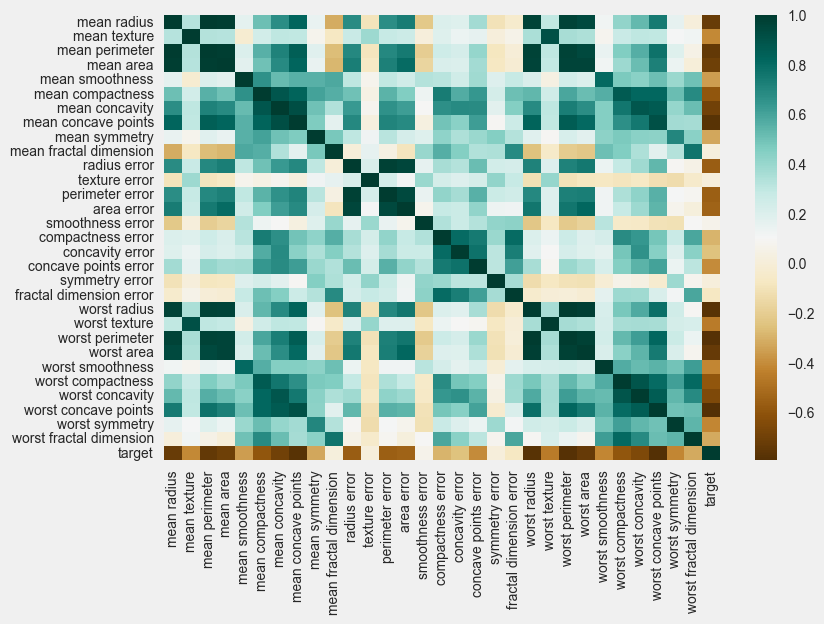

In [111]:
from sklearn import datasets
from yellowbrick.target import FeatureCorrelation
import numpy as np



import seaborn as sns
corr = data_cancer.corr()
g = sns.heatmap(corr,cmap="BrBG",annot=False,)

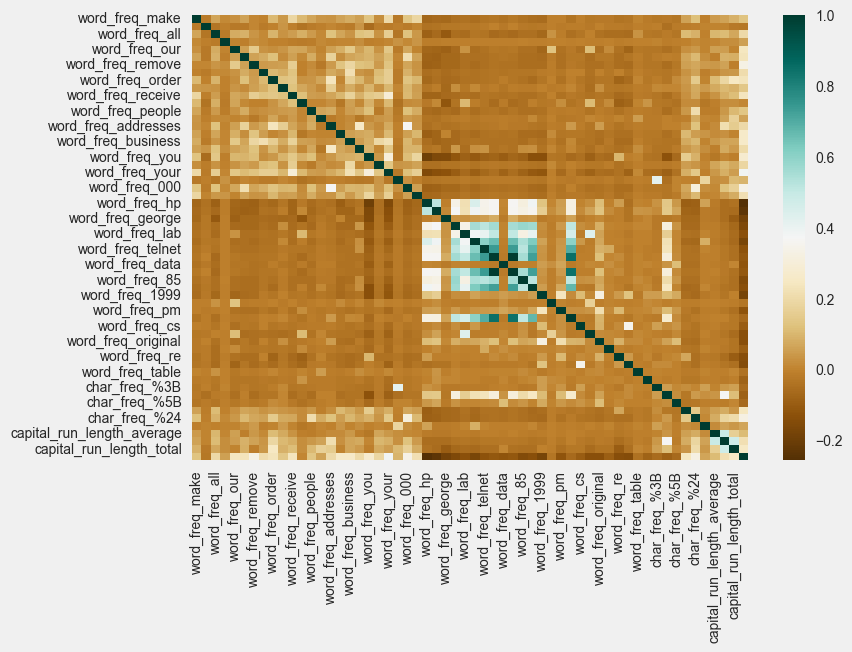

In [112]:
from sklearn import datasets
from yellowbrick.target import FeatureCorrelation
import numpy as np



import seaborn as sns
corr = data_spambase.corr()
g = sns.heatmap(corr,cmap="BrBG",annot=False,)

In [113]:
### REFERENCES https://github.com/ankitgoel1602/data-science/blob/master/clustering-projects/K-Means%20Example/k-means_example_analysis.ipynb


In [164]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

from yellowbrick.cluster import KElbowVisualizer

def show_elbow_plot(X, kmax,metric = "distortion", kmin=3):
    model = KMeans()
    visualizer = KElbowVisualizer(model, metric= metric ,k=(kmin,kmax))
    visualizer.fit(X)    
    visualizer.show()



    # Finalize and render the figure


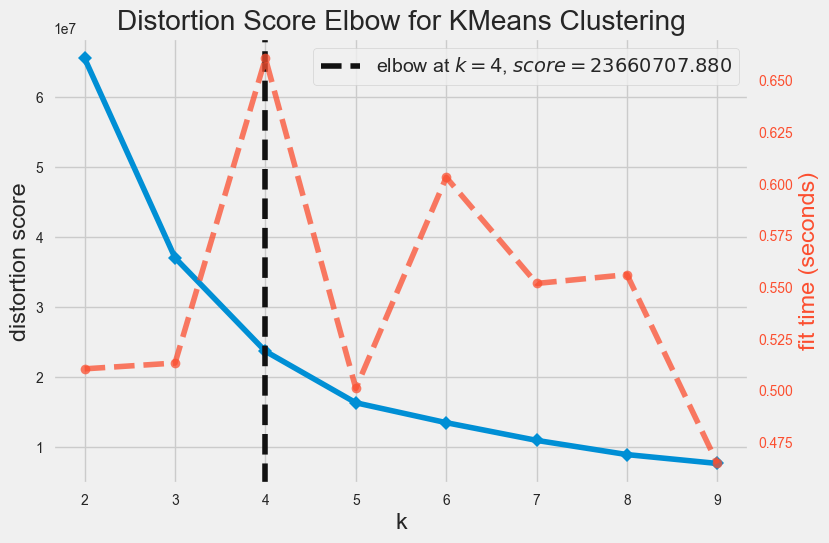

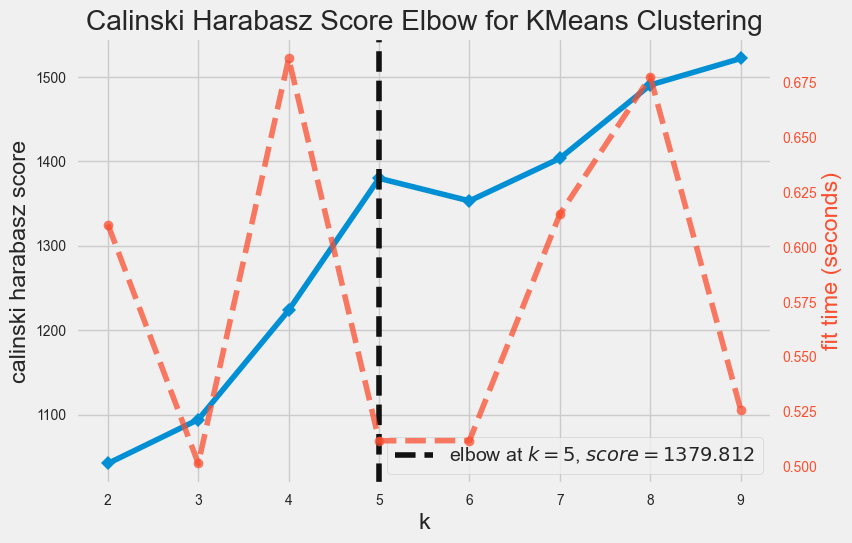

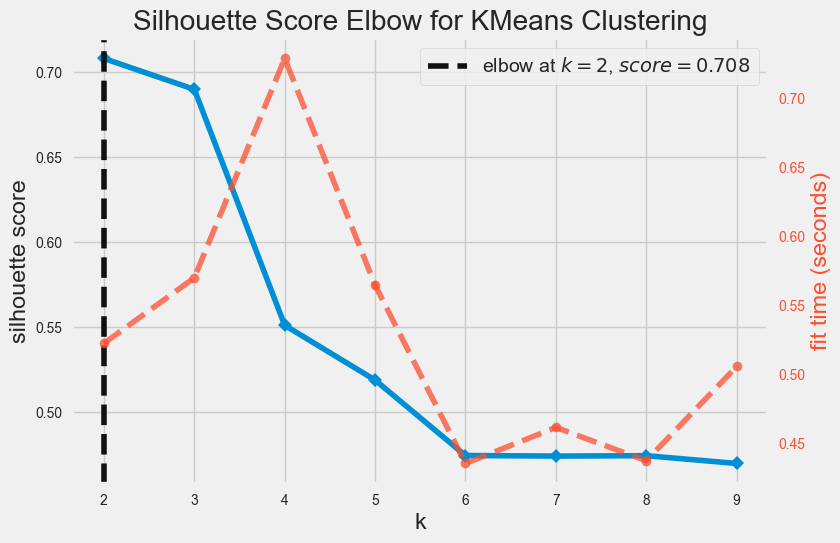

In [165]:
show_elbow_plot(cancer_X_train, metric='distortion', kmax=10, kmin=2)
show_elbow_plot(cancer_X_train, metric='calinski_harabasz', kmax=10, kmin=2)
show_elbow_plot(cancer_X_train, metric='silhouette', kmax=10, kmin=2)



/home/s/code/zmsp/ml/i-learn-unsupervised/venv/lib/python3.10/site-packages/yellowbrick/utils/kneed.py:156: YellowbrickWarning: No 'knee' or 'elbow point' detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
/home/s/code/zmsp/ml/i-learn-unsupervised/venv/lib/python3.10/site-packages/yellowbrick/cluster/elbow.py:374: YellowbrickWarning: No 'knee' or 'elbow' point detected, pass `locate_elbow=False` to remove the warning
  warnings.warn(warning_message, YellowbrickWarning)


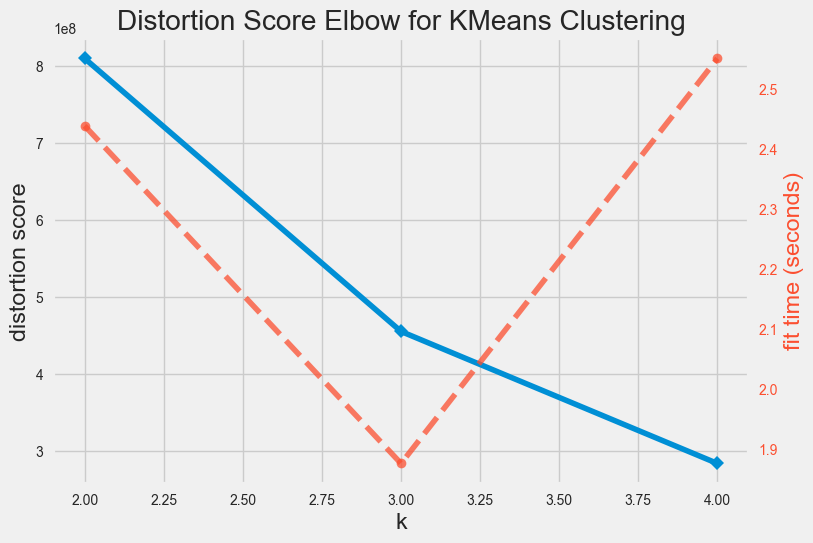

SyntaxError: invalid syntax (4048259494.py, line 1)

In [ ]:

def plot_multi_silhoette(data, k_range):
    for i in k_range:
        model = KMeans(i, random_state=42)
        visualizer = SilhouetteVisualizer(model)

        visualizer.fit(data)    
        visualizer.show()    

# plot_multi_silhoette(cancer_X_train, range(6, 9))

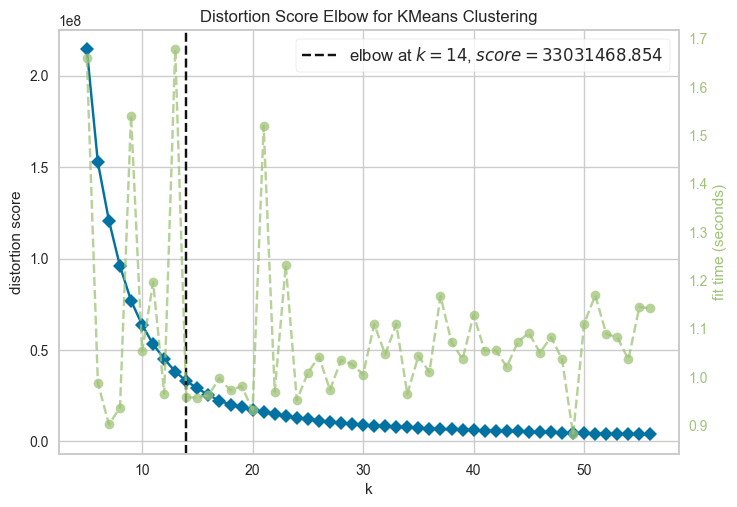

In [ ]:
show_elbow_plot(spambase_X_train, metric='distortion', kmax=57, kmin=5)

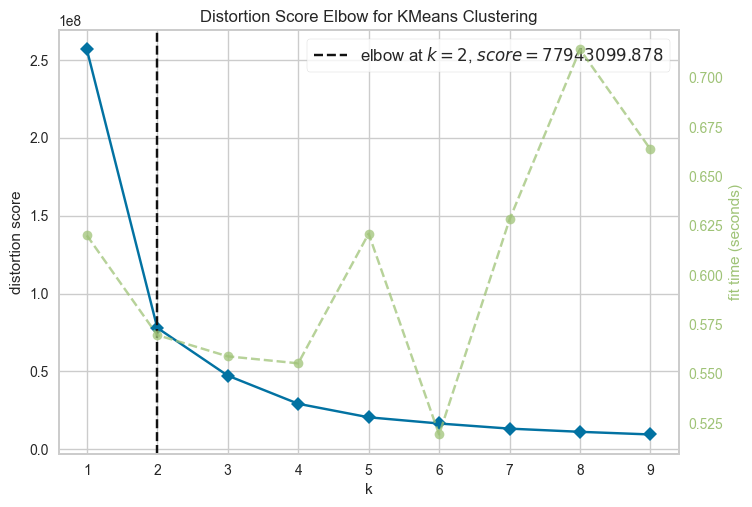

In [ ]:
show_elbow_plot(cancer_X, metric='distortion', kmax=10, kmin=1)

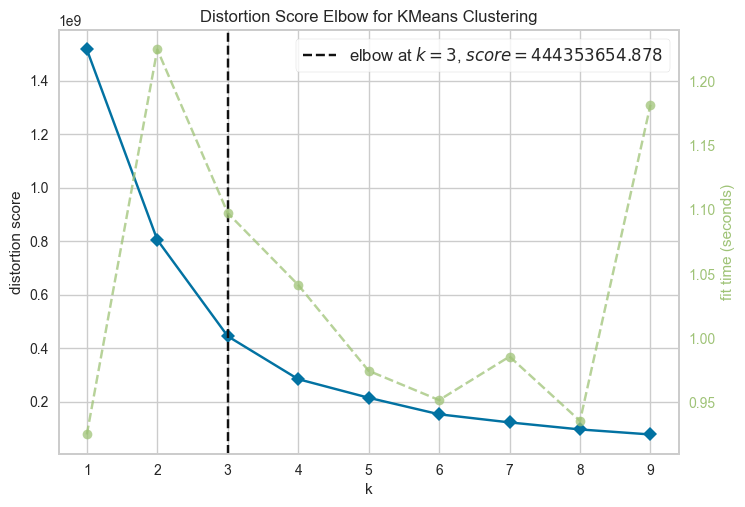

In [ ]:
show_elbow_plot(spambase_X_train, metric='distortion', kmax=10, kmin=1)




     # Finalize and render the figure


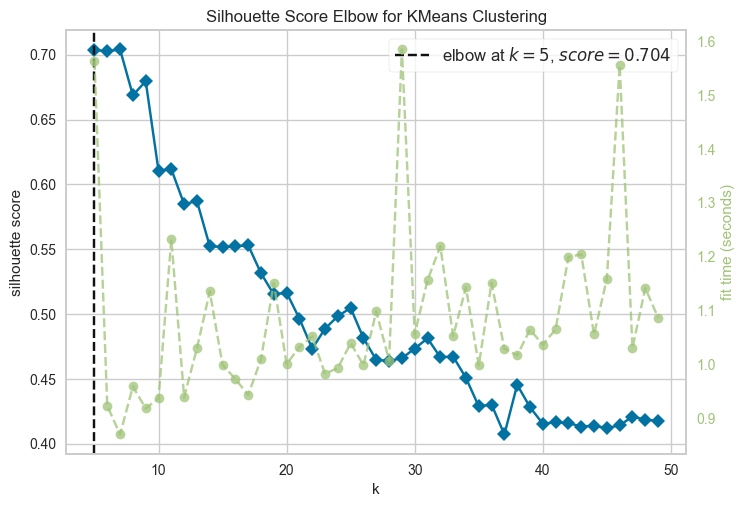

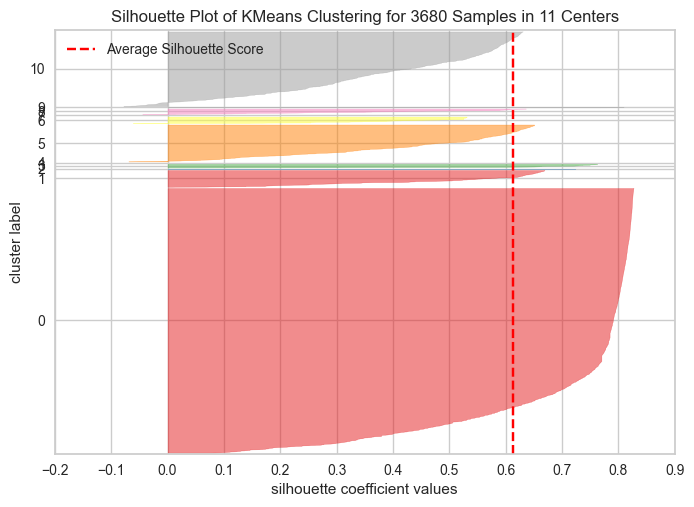

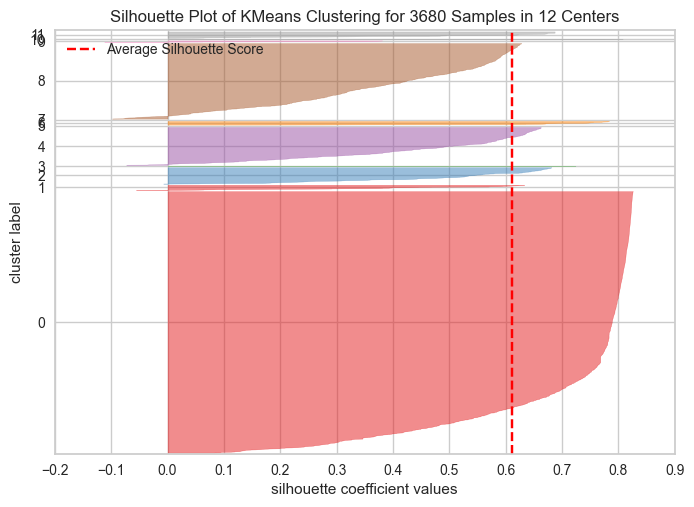

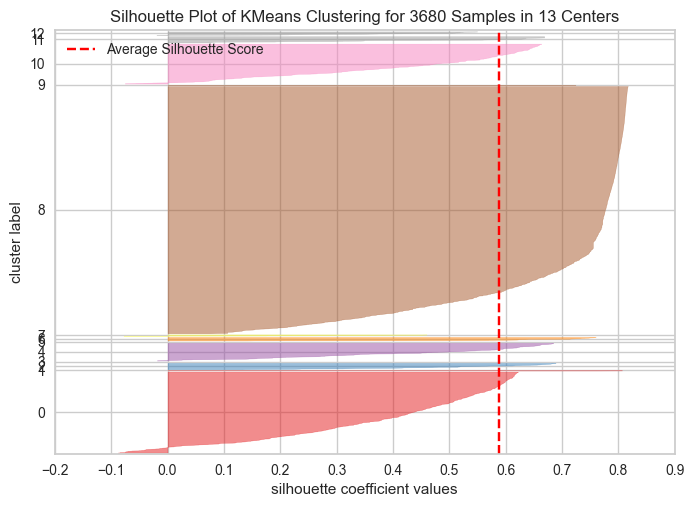

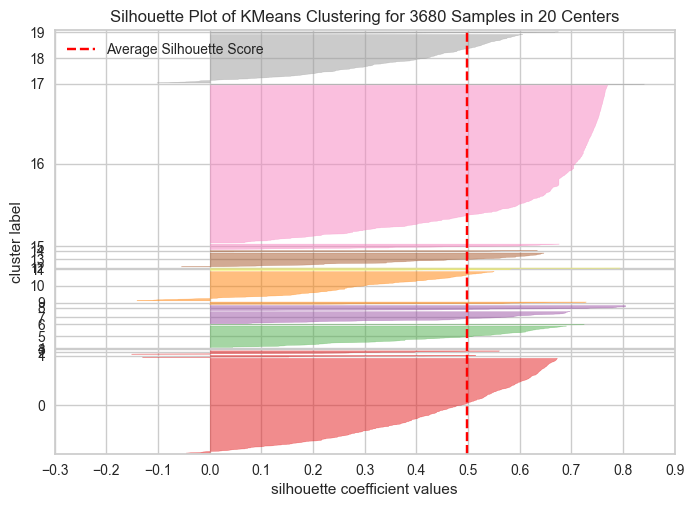

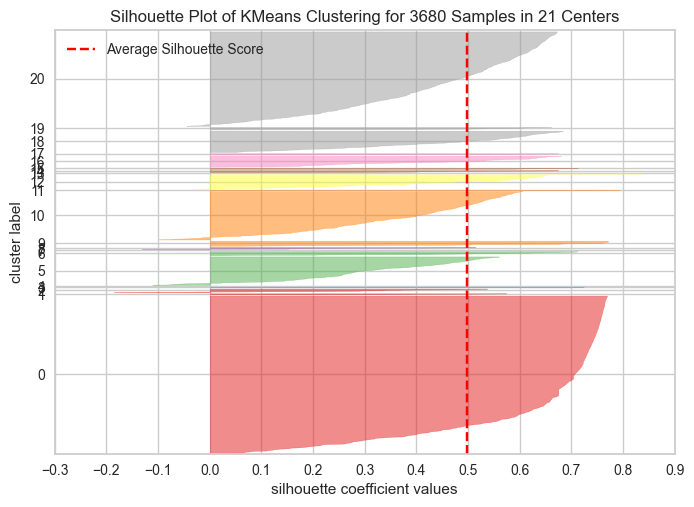

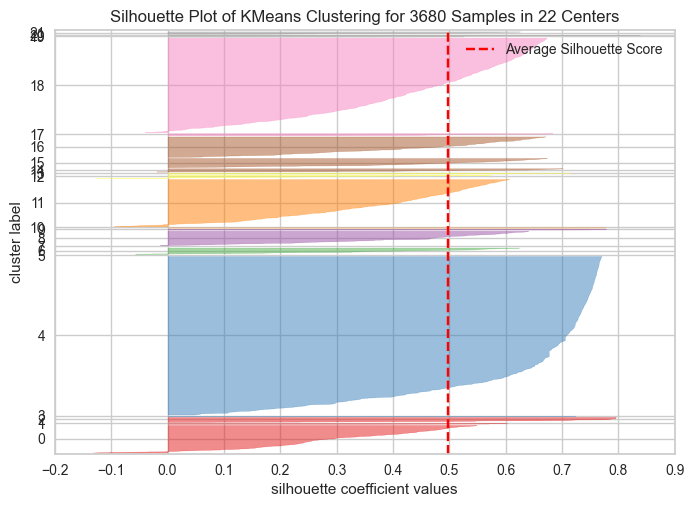

In [ ]:
plot_multi_silhoette(spambase_X_train, [11,12,13, 20,21,22])

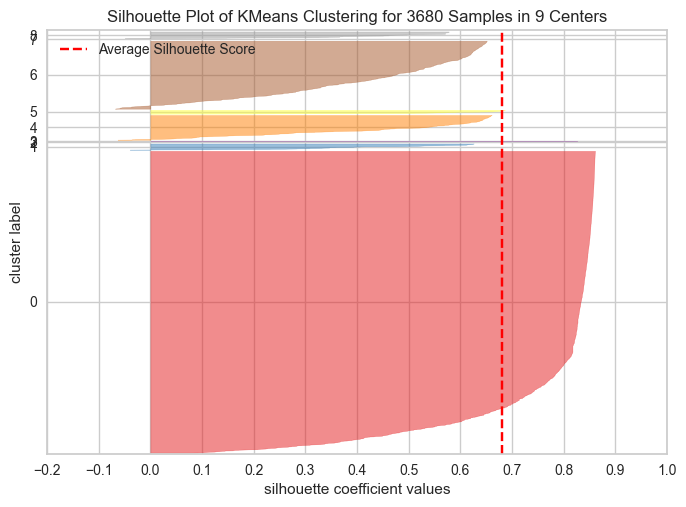

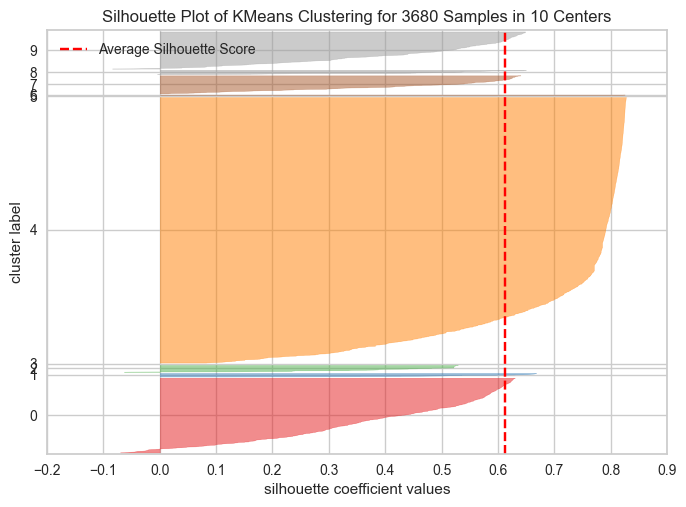

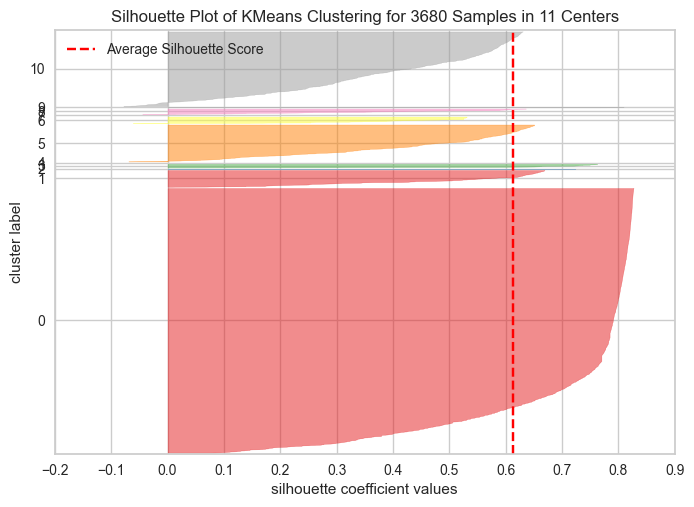

In [ ]:
plot_multi_silhoette(spambase_X_train, [9,10,11])

In [231]:
def run_EM():
    for num_classes in component_list:
        clf = GaussianMixture(n_components=num_classes,covariance_type='spherical', max_iter=no_iter, init_params= 'kmeans')


NameError: name 'num_classes' is not defined

In [233]:
data_cancer.to_csv('data/cancer.csv', index=False)
data_spambase.to_csv('data/spam.csv', index=False)

# PCA experiments

In [184]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline

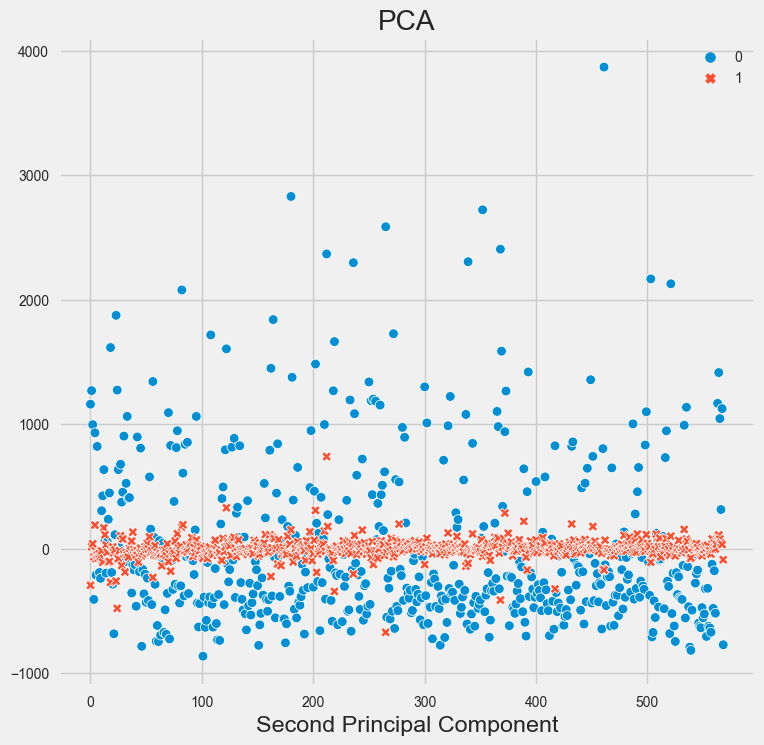

In [227]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(cancer_X, cancer_y, test_size=0.2, random_state=0)

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

from sklearn.decomposition import PCA


pca = PCA()
decisiontree = DecisionTreeClassifier(criterion = 'gini', max_depth = 15, min_samples_split = 5)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

explained_variance = pca.explained_variance_ratio_

from sklearn.decomposition import PCA

pca = PCA(n_components=1)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)


from sklearn.ensemble import RandomForestClassifier

def run_PCA(X,y,title):
    
    pca = PCA(random_state=5).fit(X) #for all components
    cum_var = np.cumsum(pca.explained_variance_ratio_)

    fig, ax1 = plt.subplots()
    ax1.plot(list(range(len(pca.explained_variance_ratio_))), cum_var, 'b-')
    ax1.set_xlabel('Principal Components')
    # Make the y-axis label, ticks and tick labels match the line color.
    ax1.set_ylabel('Cumulative Explained Variance Ratio', color='b')
    ax1.tick_params('y', colors='b')
    plt.grid(False)

    ax2 = ax1.twinx()
    ax2.plot(list(range(len(pca.singular_values_))), pca.singular_values_, 'm-')
    ax2.set_ylabel('Eigenvalues', color='m')
    ax2.tick_params('y', colors='m')
    plt.grid(False)

    plt.title("PCA Explained Variance and Eigenvalues: "+ title)
    fig.tight_layout()
    plt.show()
    
def run_ICA(X,y,title):
    
    dims = list(np.arange(2,(X.shape[1]-1),3))
    dims.append(X.shape[1])
    ica = ICA(random_state=5)
    kurt = []

    for dim in dims:
        ica.set_params(n_components=dim)
        tmp = ica.fit_transform(X)
        tmp = pd.DataFrame(tmp)
        tmp = tmp.kurt(axis=0)
        kurt.append(tmp.abs().mean())

    plt.figure()
    plt.title("ICA Kurtosis: "+ title)
    plt.xlabel("Independent Components")
    plt.ylabel("Avg Kurtosis Across IC")
    plt.plot(dims, kurt, 'b-')
    plt.grid(False)
    plt.show()

In [230]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(cancer_X, cancer_y, test_size=0.2, random_state=0)

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

from sklearn.decomposition import PCA

pca = PCA()
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

explained_variance = pca.explained_variance_ratio_

from sklearn.decomposition import PCA

pca = PCA(n_components=4)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)


from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)


from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
ac = accuracy_score(y_test, y_pred)
print(ac)
# Predicting the Test set results




[[42  5]
 [ 6 61]]
0.9035087719298246


In [192]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

ImportError: cannot import name 'fetch_mldata' from 'sklearn.datasets' (/home/s/code/zmsp/ml/i-learn-unsupervised/venv/lib/python3.10/site-packages/sklearn/datasets/__init__.py)

In [193]:
pca = PCA(2)
data = pca.fit_transform(x)
principalDf = pd.DataFrame(data = data
             , columns = ['principal component 1', 'principal component 2'])

In [197]:
data_cancer.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


KeyError: 'principal component 1'

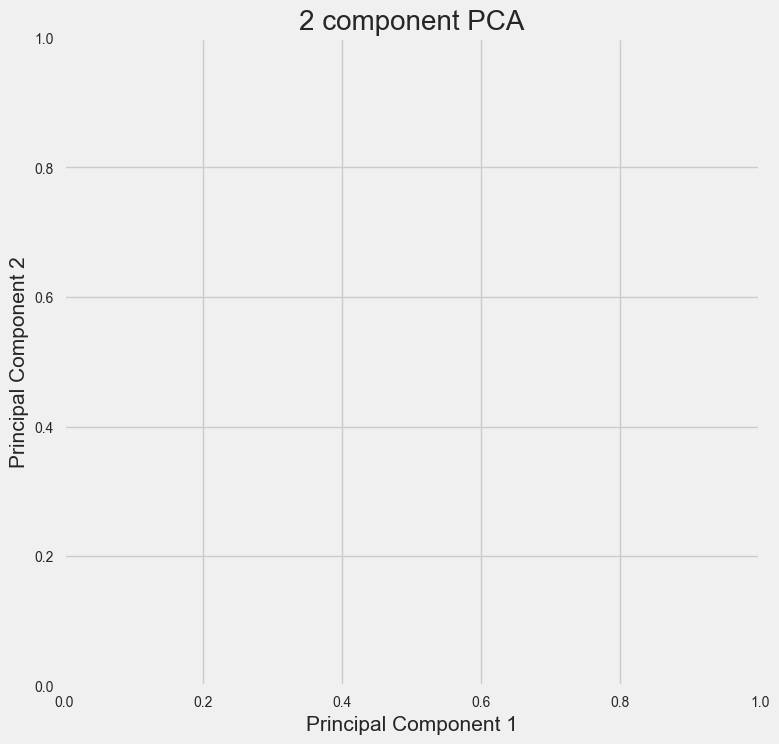

In [200]:
finalDf = data_cancer

from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])


fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

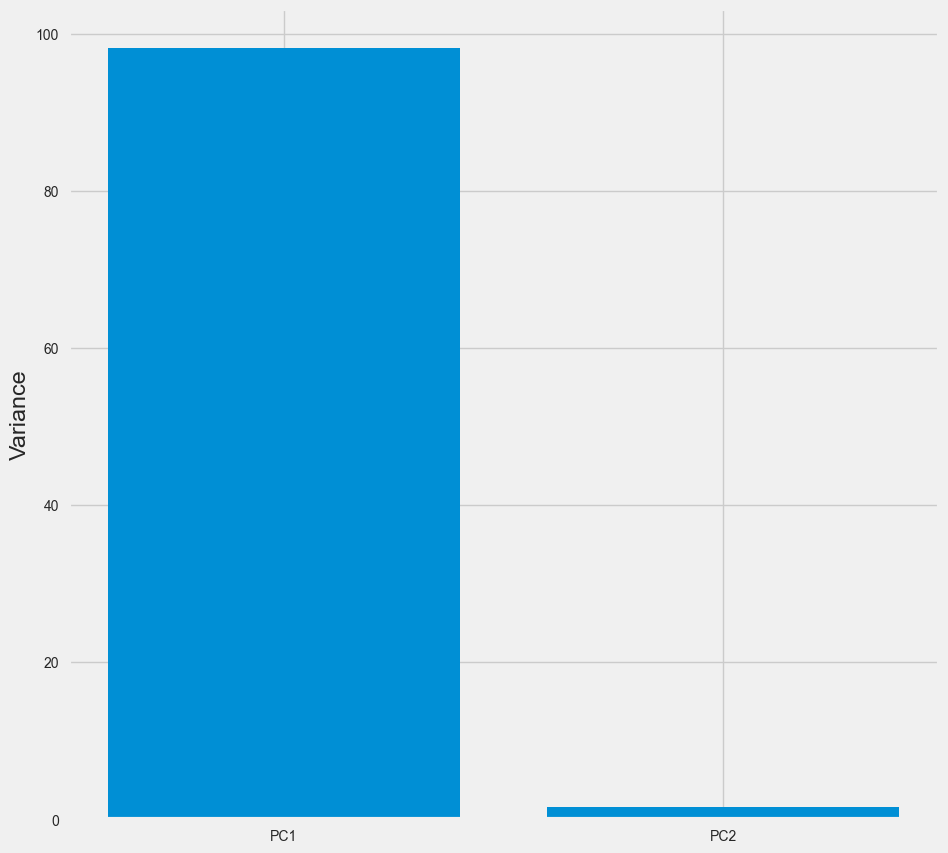

In [148]:
plt.figure(figsize=(10,10))
var = np.round(pca.explained_variance_ratio_*100, decimals = 1)
lbls = ['PC'+ str(x) for x in range(1,len(var)+1)]
plt.bar(x=range(1,len(var)+1), height = var, tick_label = lbls)
plt.ylabel('Variance')
plt.show()

In [178]:
model1 = KMeans(n_clusters = 4, init = "k-means++")
label = model1.fit_predict(data)
print(label)

[3 3 3 2 3 1 3 1 1 1 1 1 3 1 1 1 1 3 0 1 2 2 1 0 3 3 1 3 1 3 3 1 3 3 1 1 1
 2 1 1 1 2 3 1 1 3 2 1 2 1 2 1 2 3 1 2 3 1 2 2 2 2 1 2 1 1 2 2 2 2 3 2 3 1
 2 1 2 3 3 2 2 2 0 3 2 3 1 3 2 1 1 1 1 1 1 3 2 2 2 1 1 2 2 2 2 1 2 2 0 2 2
 2 1 2 2 2 2 1 1 3 2 3 0 1 2 1 1 3 1 3 2 1 1 1 3 2 2 2 1 2 2 1 2 2 2 2 2 1
 1 1 2 2 2 2 1 2 3 1 2 2 2 3 3 2 0 1 2 3 3 1 2 1 1 2 2 2 2 1 2 2 0 3 1 2 1
 2 3 2 2 2 1 2 2 1 1 2 1 3 3 1 2 3 3 1 2 1 2 1 2 1 3 2 0 1 1 1 2 2 3 0 1 1
 2 1 1 1 2 1 2 1 1 2 2 3 2 1 0 3 1 3 1 2 2 1 3 2 2 2 2 2 3 2 3 3 3 1 3 1 1
 1 3 3 3 1 3 0 2 1 2 2 1 2 0 2 3 2 2 3 1 1 3 2 3 1 2 2 2 2 2 2 1 1 2 2 2 1
 2 2 1 2 3 2 3 2 2 2 2 2 1 1 2 1 2 2 2 2 2 3 2 2 2 3 2 3 2 2 1 2 1 1 1 2 2
 2 2 3 2 3 2 0 1 2 2 3 2 2 2 1 2 2 2 1 0 1 2 2 2 1 2 2 2 2 2 1 1 3 3 2 0 0
 1 1 3 3 1 1 2 1 1 2 2 2 2 2 2 1 2 1 2 3 2 2 3 3 2 1 1 2 2 2 3 2 2 2 2 2 1
 2 3 2 2 2 2 1 1 2 2 3 2 2 2 1 2 1 2 2 2 2 2 2 1 2 3 3 1 1 2 1 1 1 2 3 1 2
 3 2 3 1 1 3 2 3 2 1 2 1 2 2 2 2 3 0 1 2 1 1 1 2 3 2 2 2 1 2 2 2 1 1 2 1 2
 1 1 1 1 2 1 3 2 1 2 3 3 

In [179]:
model2 = KMeans(n_clusters = 7, init = "k-means++")
y2 = model2.fit_predict(data)

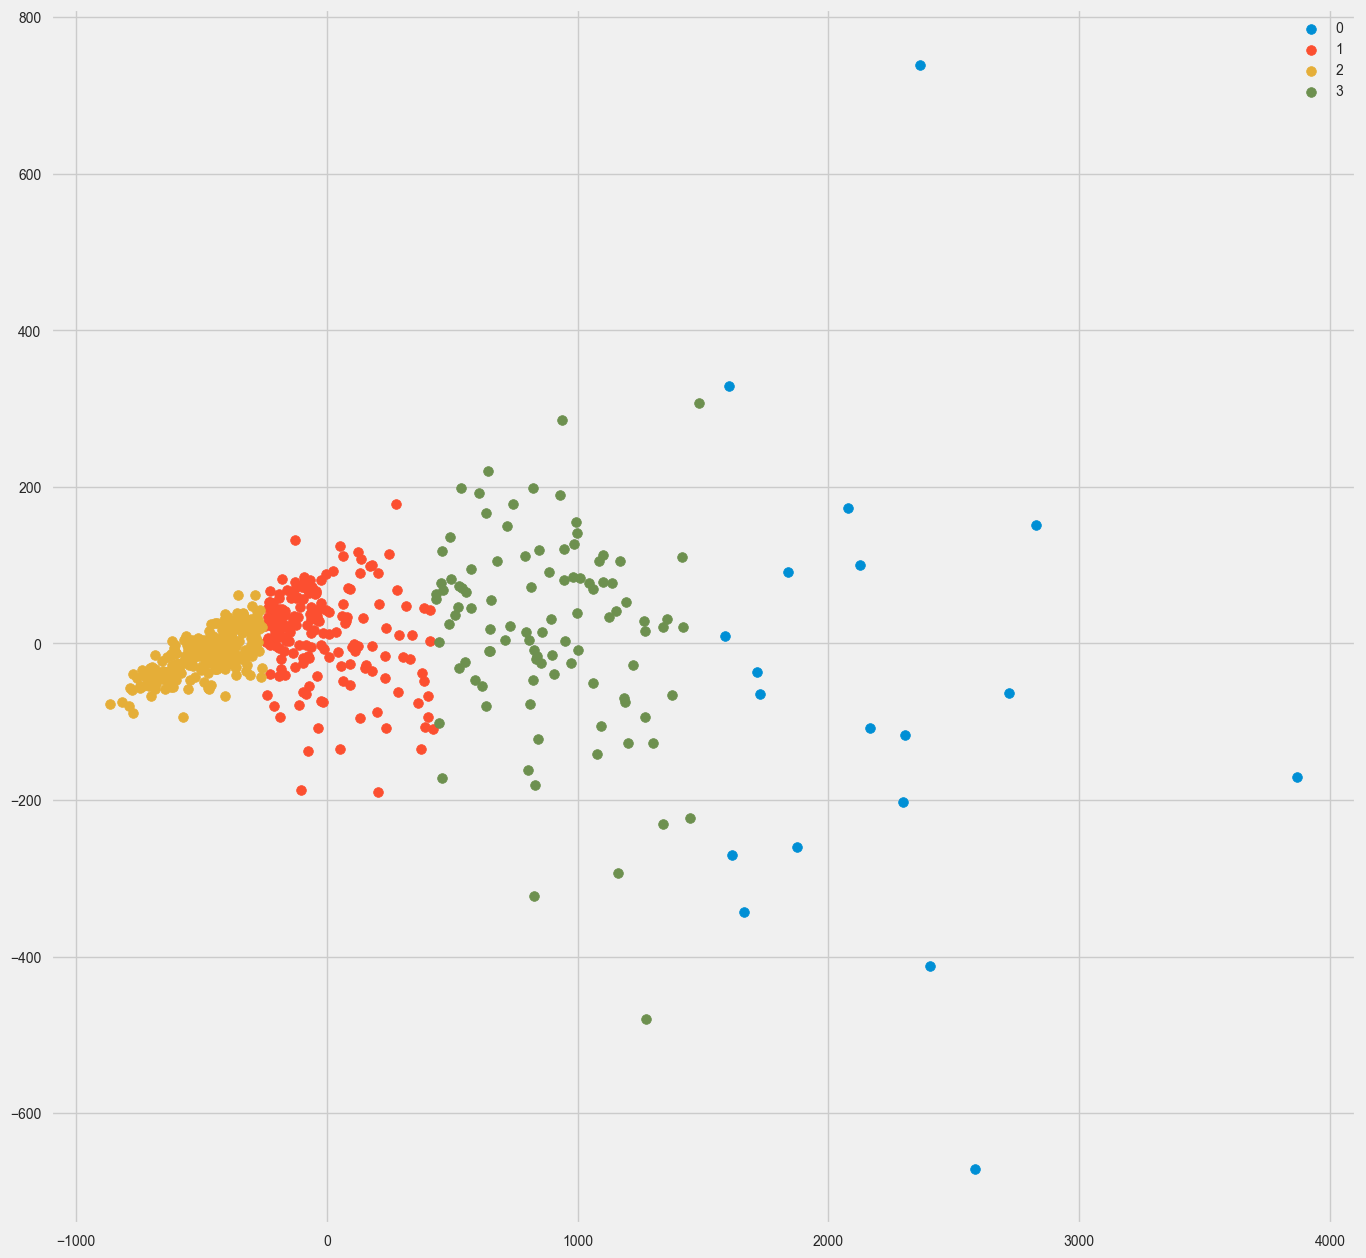

In [180]:
plt.figure(figsize=(15,15))
uniq = np.unique(label)
for i in uniq:
  plt.scatter(data[label == i , 0] , data[label == i , 1] , label = i)
  
plt.legend()
plt.show()

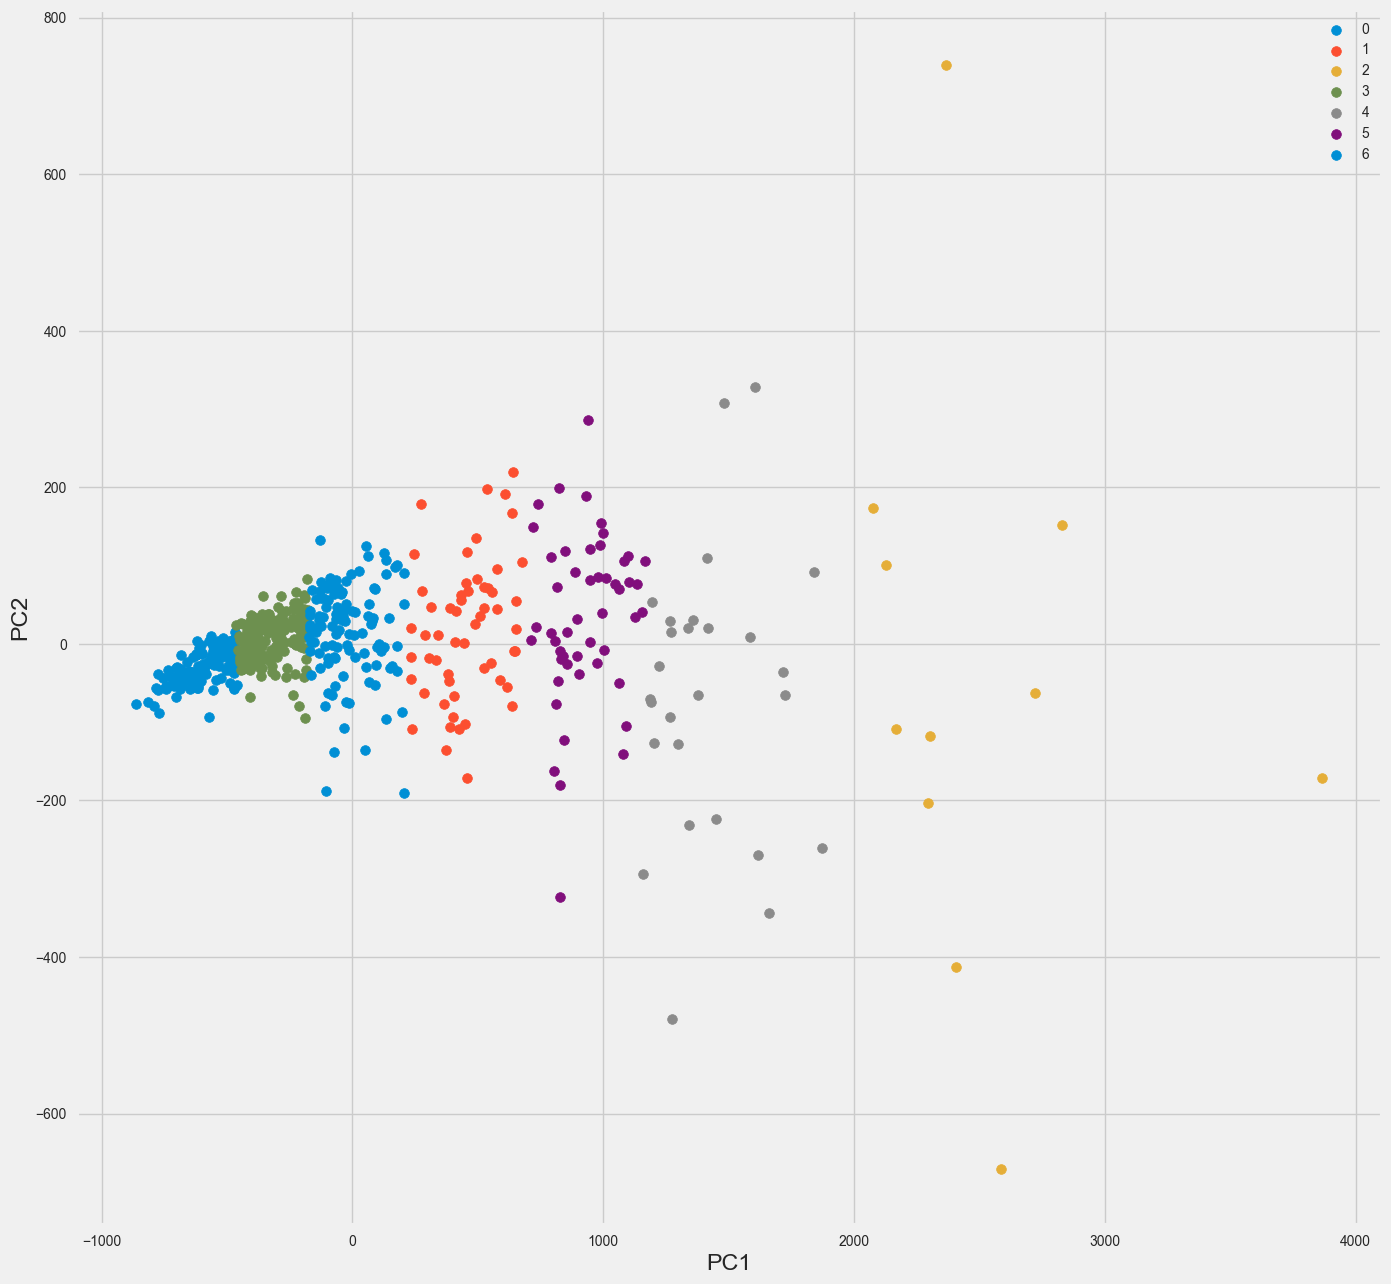

In [181]:
label2 = model2.fit_predict(data)
plt.figure(figsize=(15,15))
uniq = np.unique(label2)
for i in uniq:
  plt.scatter(data[label2 == i , 0] , data[label2 == i , 1] , label = i)
plt.xlabel([])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

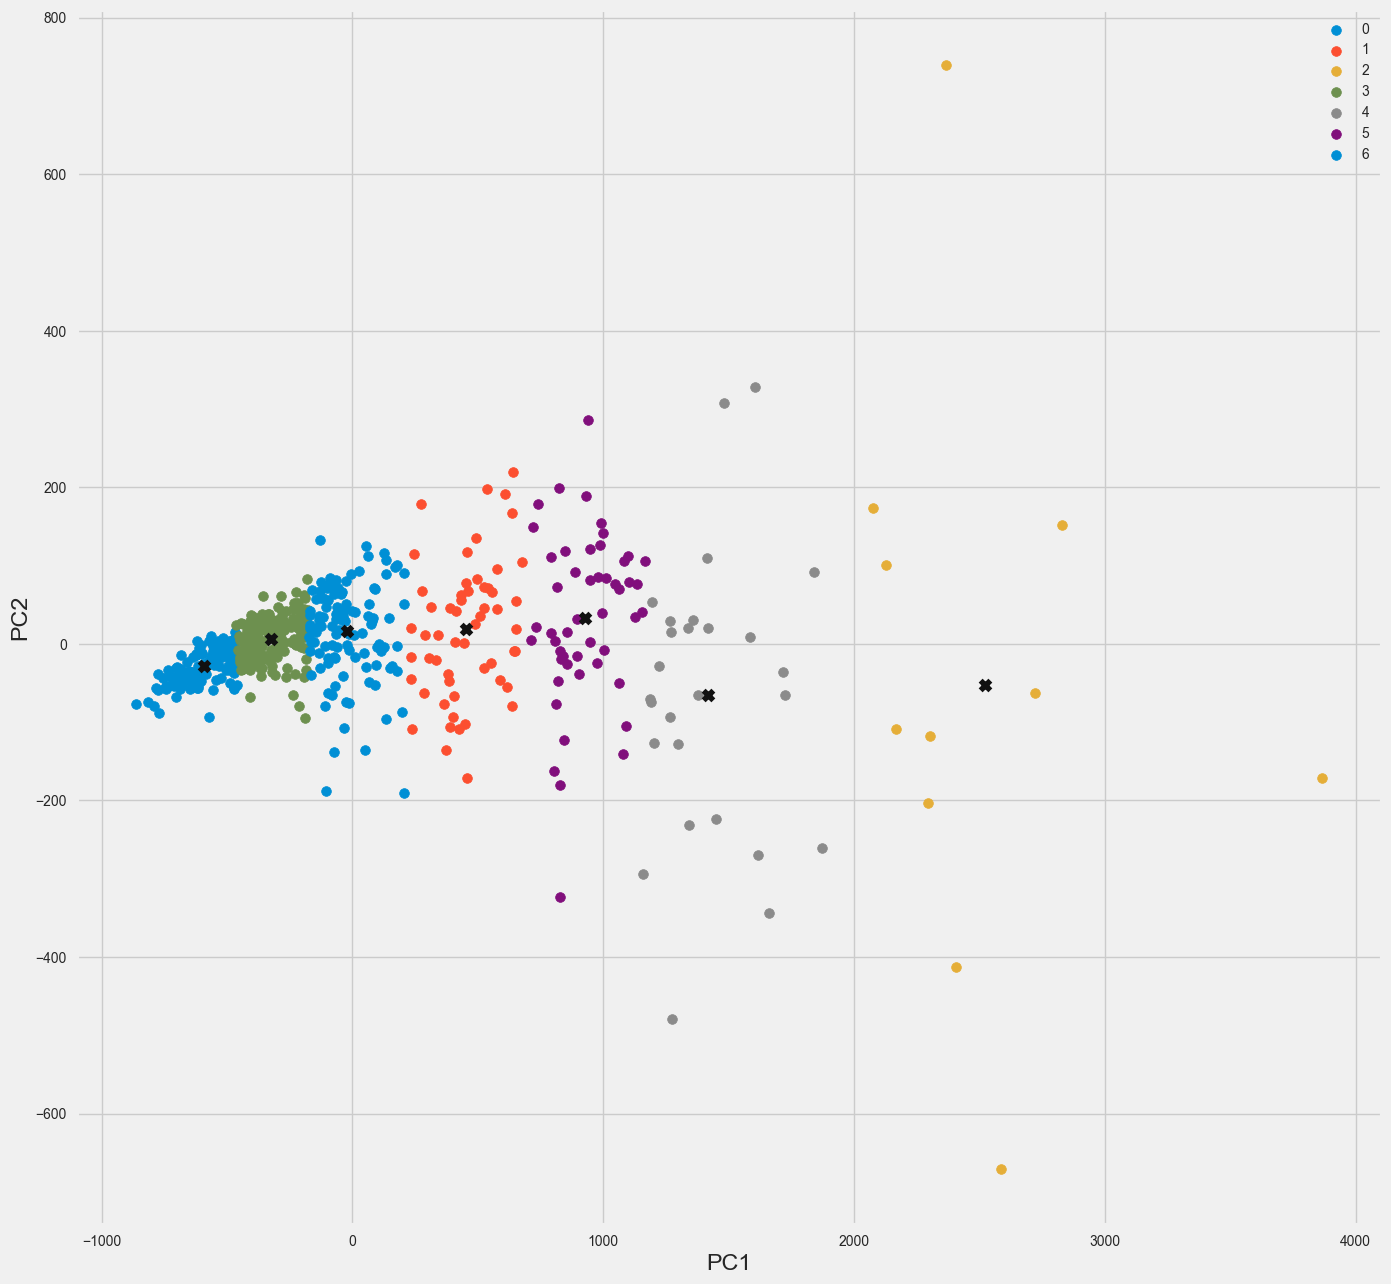

In [182]:
centers = np.array(model2.cluster_centers_)
plt.figure(figsize=(15,15))
uniq = np.unique(label2)

for i in uniq:
  plt.scatter(data[label2 == i , 0] , data[label2 == i , 1] , label = i)
plt.xlabel([])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.scatter(centers[:,0], centers[:,1], marker="x", color='k')
plt.legend()
plt.show()


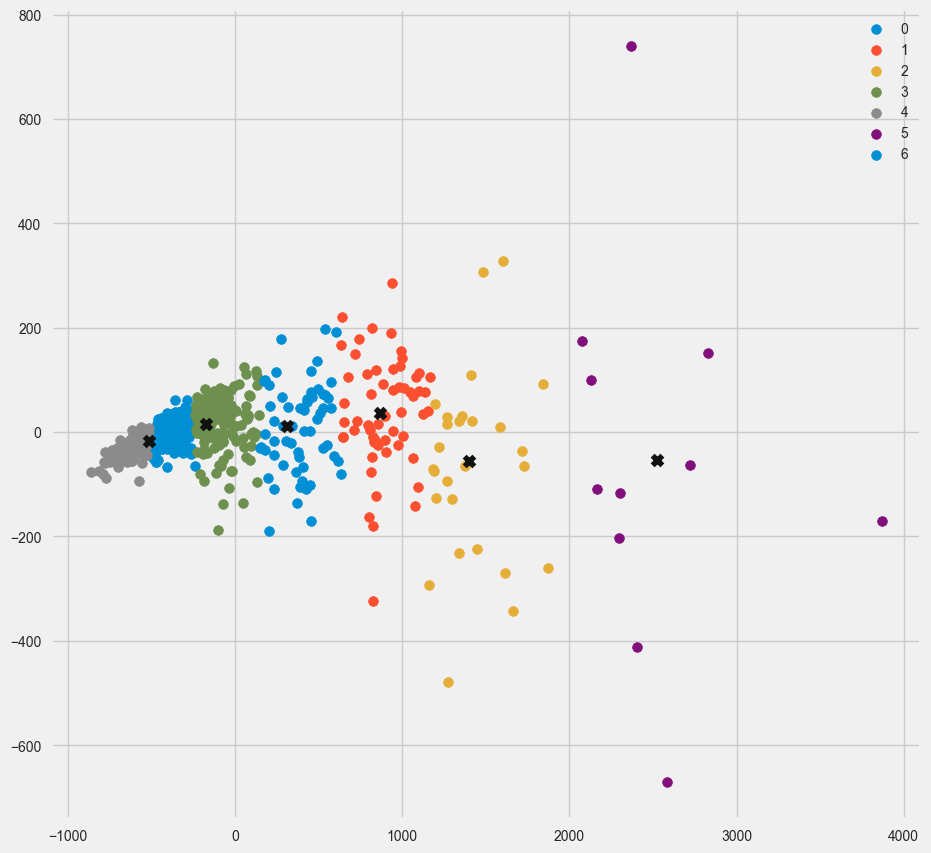

In [174]:
centers = np.array(model2.cluster_centers_)
model = KMeans(n_clusters = 7, init = "k-means++")
label = model.fit_predict(data)
plt.figure(figsize=(10,10))
uniq = np.unique(label)
for i in uniq:
   plt.scatter(data[label == i , 0] , data[label == i , 1] , label = i)
plt.scatter(centers[:,0], centers[:,1], marker="x", color='k')
#This is done to find the centroid for each clusters.
plt.legend()
plt.show()

In [139]:

transformed_df = pd.DataFrame(pca.transform(X_scaled), 
                              columns=['PC1', 'PC2', 'PC3', 
                                       'PC4', 'PC5', 'PC6'])


In [175]:
transformed_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6
0,9.225770,2.116196,-0.948109,-3.695778,-1.256280,1.419117
1,2.655802,-3.784776,-0.502825,-1.123938,0.551107,0.019273
2,5.892492,-1.005579,-0.487149,-0.942486,-0.191711,0.541331
3,7.135401,10.318716,-3.339501,-0.085947,-2.938456,3.062747
4,4.129423,-1.905579,1.454000,-2.880175,0.365289,-1.243428


(569, 6)

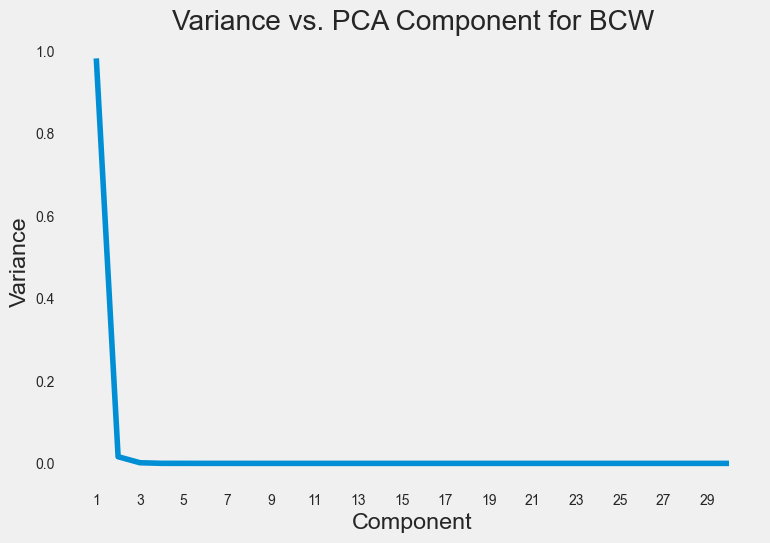

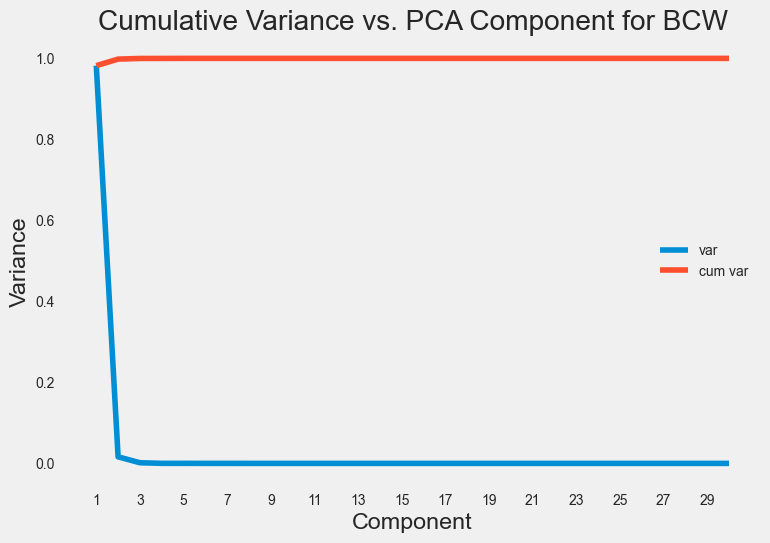

In [135]:

pca = PCA()
pca.fit(cancer_X)
plt.figure()
plt.plot(np.arange(1, pca.explained_variance_ratio_.size + 1), pca.explained_variance_ratio_)
plt.xticks(np.arange(1, pca.explained_variance_ratio_.size + 1, 2))
plt.xlabel('Component')
plt.ylabel('Variance')
plt.title('Variance vs. PCA Component for BCW')
plt.grid()

plt.figure()
plt.plot(np.arange(1, pca.explained_variance_ratio_.size + 1), pca.explained_variance_ratio_, label='var')
plt.plot(np.arange(1, pca.explained_variance_ratio_.size + 1), np.cumsum(pca.explained_variance_ratio_), label='cum var')
plt.xticks(np.arange(1, pca.explained_variance_ratio_.size + 1, 2))
plt.xlabel('Component')
plt.ylabel('Variance')
plt.title('Cumulative Variance vs. PCA Component for BCW')
plt.legend()
plt.grid()
plt.savefig('bc_pca_variance.png')

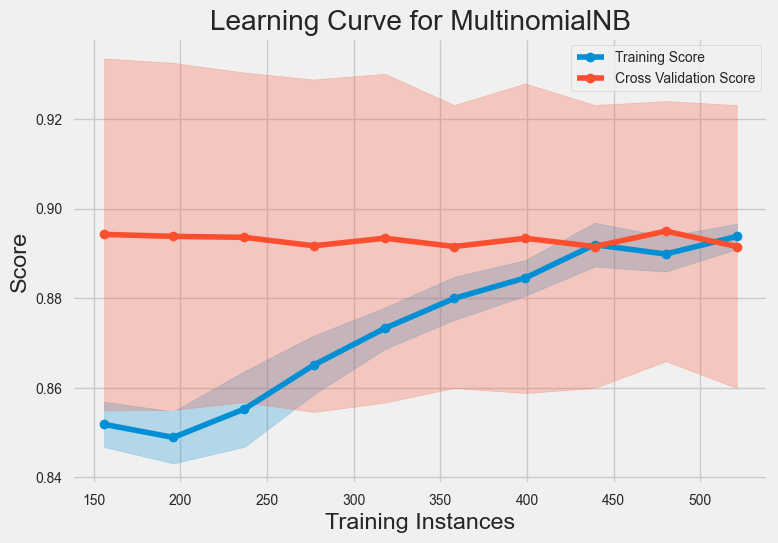

<AxesSubplot: title={'center': 'Learning Curve for MultinomialNB'}, xlabel='Training Instances', ylabel='Score'>

In [134]:
import numpy as np

from sklearn.model_selection import StratifiedKFold
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

from yellowbrick.datasets import load_game
from yellowbrick.model_selection import LearningCurve

# # Load a classification dataset
# X, y = load_game()

# # Encode the categorical data
# X = OneHotEncoder().fit_transform(X)
# y = LabelEncoder().fit_transform(y)

# Create the learning curve visualizer
cv = StratifiedKFold(n_splits=12)
sizes = np.linspace(0.3, 1.0, 10)

# Instantiate the classification model and visualizer
model = MultinomialNB()
visualizer = LearningCurve(
    model, cv=cv, scoring='f1_weighted', train_sizes=sizes, n_jobs=4
)

visualizer.fit(cancer_X, cancer_y)        # Fit the data to the visualizer
visualizer.show() 

In [ ]:
from yellowbrick.datasets import load_credit
from yellowbrick.features import PCA

# Specify the features of interest and the target
X, y = load_credit()
classes = ['account in default', 'current with bills']

visualizer = PCA(scale=True)
visualizer.fit_transform(X, y)
visualizer.show()

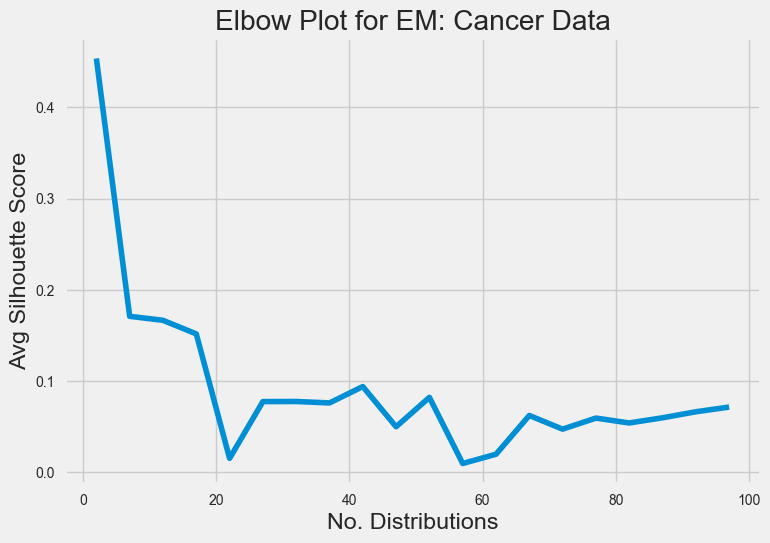

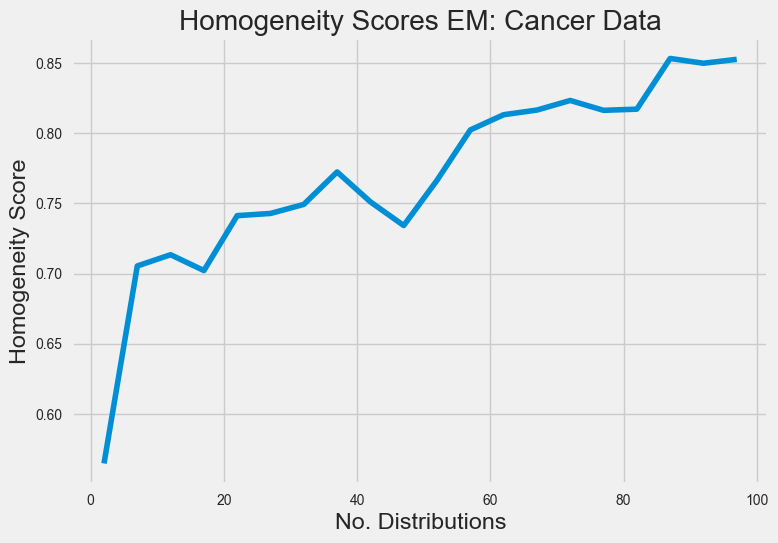

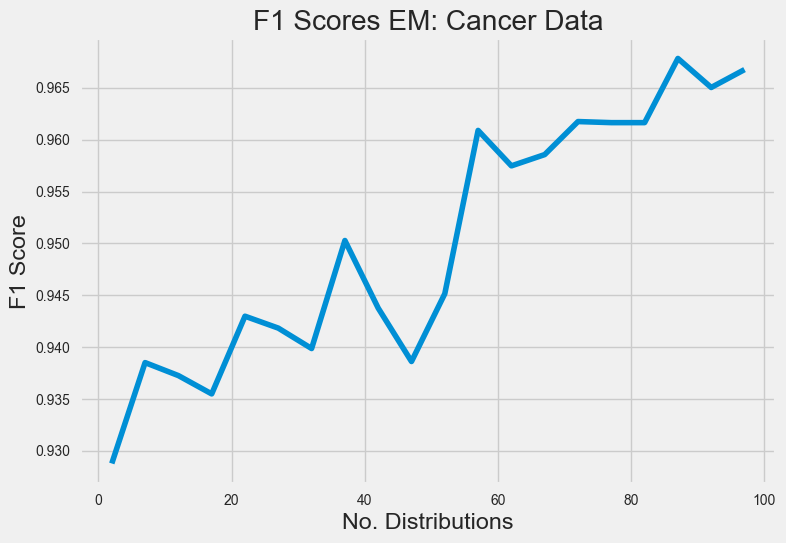

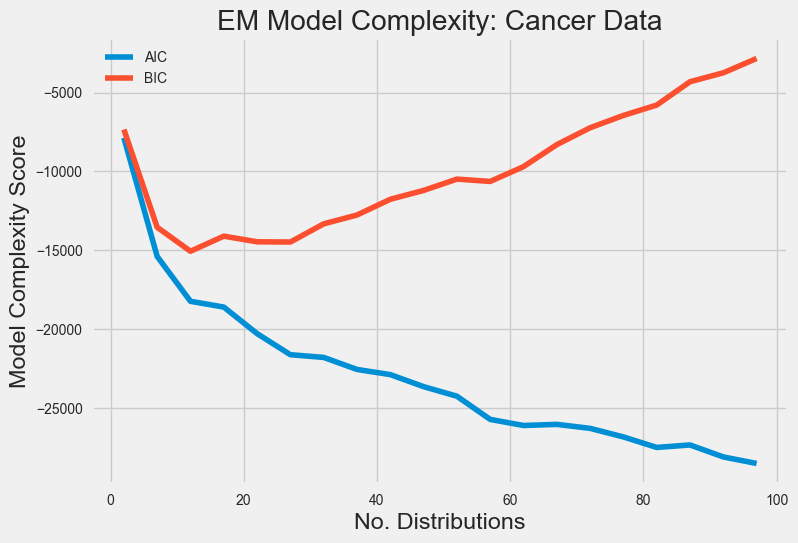

NameError: name 'roc_auc_score' is not defined

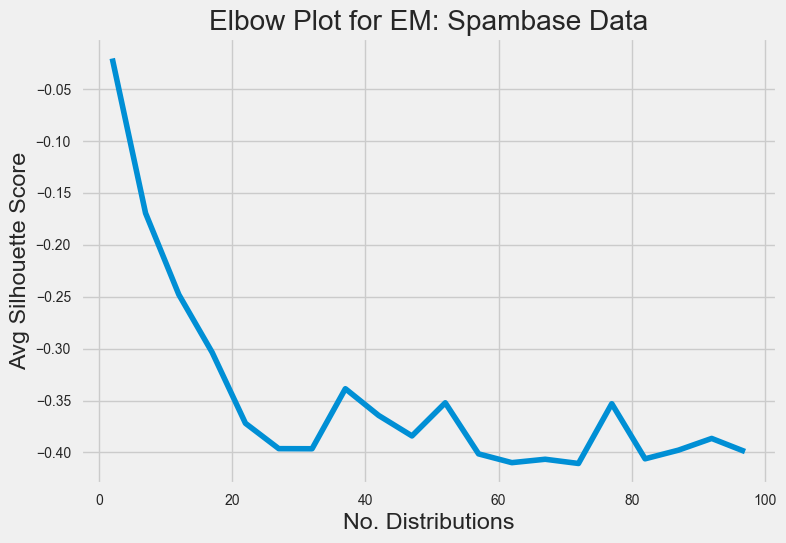

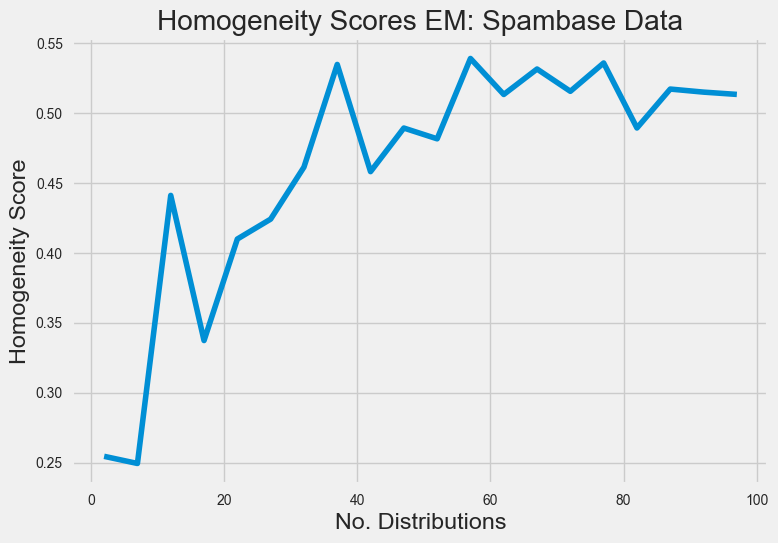

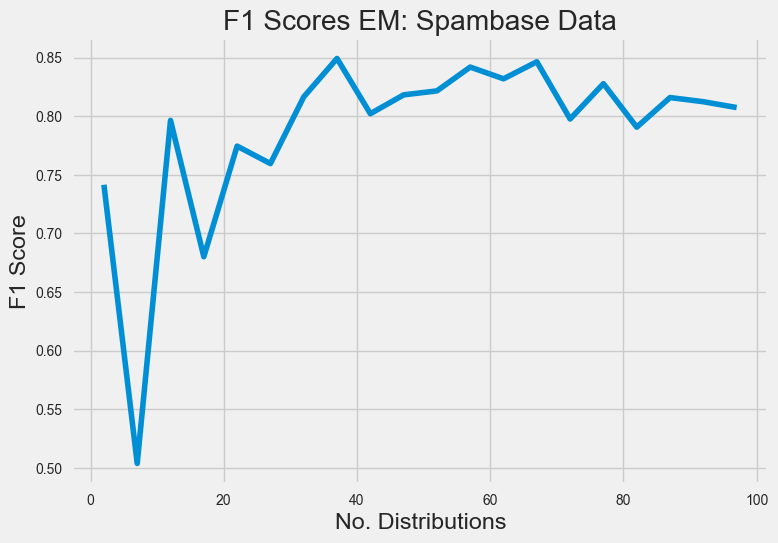

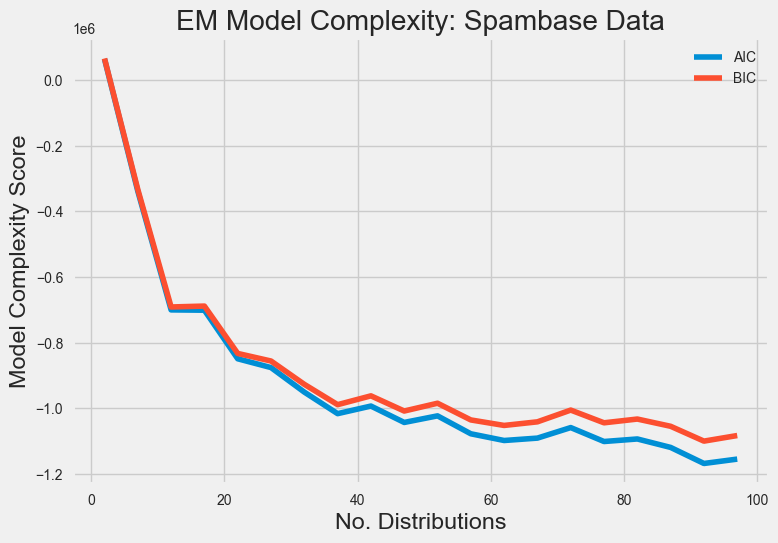

Model Evaluation Metrics Using Mode Cluster Vote
*****************************************************
Model Training Time (s):   0.14
No. Iterations to Converge: 44
Log-likelihood Lower Bound: 20.57
F1 Score:  0.94
Accuracy:  0.93     AUC:       0.92
Precision: 0.93     Recall:    0.96
*****************************************************


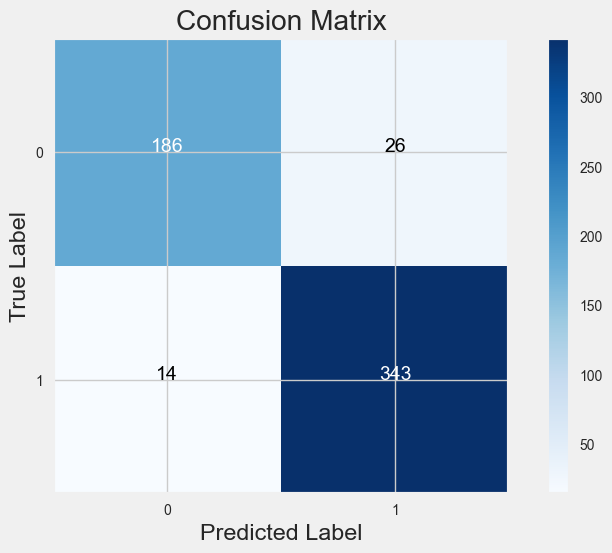

<AxesSubplot: title={'center': 'Principal Component Plot'}, xlabel='$PC_1$', ylabel='$PC_2$'>

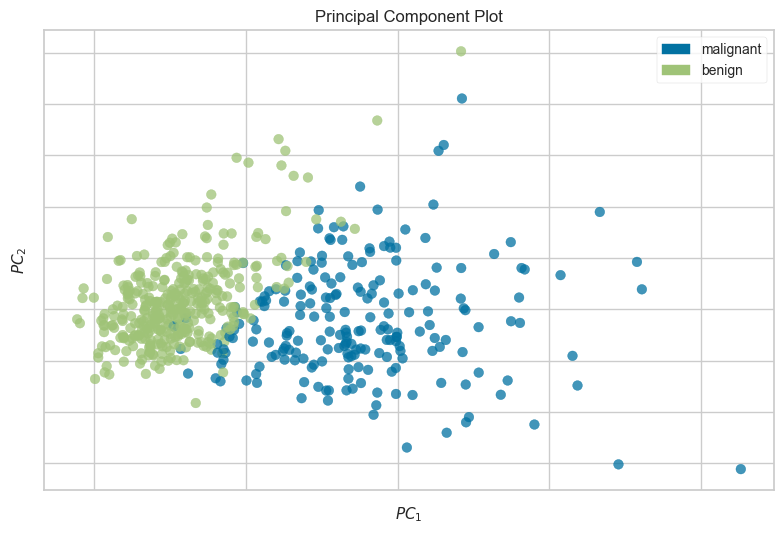

In [ ]:
from yellowbrick.features import PCA

# Creating the 2D scatter plot by utilizing PCA
visualizer = PCA(scale=True, projection=2, 
                 classes=classes)

visualizer.fit_transform(X, y)

# Saving plot in PNG format
visualizer.show(outpath="PC_Plot_2D.png")

<AxesSubplot: title={'center': 'Validation Curve for RandomForestClassifier'}, xlabel='max_depth', ylabel='score'>

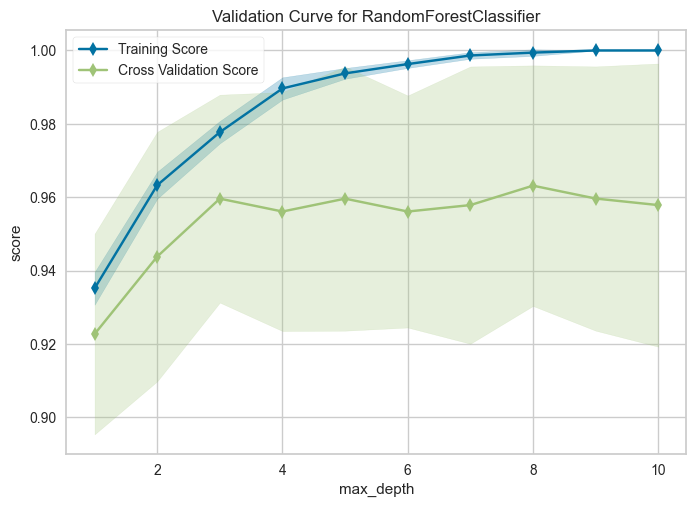

In [ ]:
from yellowbrick.model_selection import ValidationCurve
import numpy as np
visualizer = ValidationCurve(RandomForestClassifier(), 
                             param_name="max_depth", n_jobs=-1,
                             param_range=np.arange(1, 11), 
                             cv=10, scoring="accuracy")

visualizer.fit(X, y)

# Saving plot in PNG format
visualizer.show(outpath="Validation_Curve.png")